## Importing Libraries and Reading Data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

In [3]:
d4 = pd.read_csv("High_Value_Dataset__November_2023.csv")

## Data Overview

The dataset contains information related to individuals incarcerated in a penal system in the Austin city of Texas, United States. The data has been sourced from data.gov.<br>

This data consists of 131191 rows and 20 columns namely:<br>

**1. SID Number:** Unique identifier for each individual in the system.<br>
**2. TDCJ Number:** Texas Department of Criminal Justice number, suggesting that these records are from Texas.<br>
**3. Name:** The name of the incarcerated individual.<br>
**4. Current Facility:** The facility where the individual is currently held.<br>
**5. Gender:** The gender of the individual.<br>
**6. Race:** The race of the individual.<br>
**7. Age:** The age of the individual.<br>
**8. Projected Release:** The projected date of release for the individual.<br>
**9. Maximum Sentence Date:** The latest possible release date given the sentence.<br>
**10. Parole Eligibility Date:** The date from which the individual is eligible for parole.<br>
**11. Case Number:** The court case number associated with the individual's sentence.<br>
**12. County:** The county in which the offense was adjudicated.<br>
**13. Offense Code:** A numeric code identifying the specific offense.<br>
**14. TDCJ Offense:** The offense for which the individual was convicted, as recorded by the Texas Department of Criminal Justice.<br>
**15. Sentence Date:** The date on which the sentence was handed down.<br>
**16. Offense Date:** The date on which the offense was committed.<br>
**17. Sentence (Years):** The length of the sentence in years.<br>
**18. Last Parole Decision:** The most recent decision made regarding the individual's parole.<br>
**19. Next Parole Review Date:** The scheduled date for the next review of the individual's parole status.<br>
**20. Parole Review Status:** The current status of the individual's parole review process.<br>

In [4]:
# Overview of the data

d4.head()

,SID Number,TDCJ Number,Name,Current Facility,Gender,Race,Age,Projected Release,Maximum Sentence Date,Parole Eligibility Date,Case Number,County,Offense Code,TDCJ Offense,Sentence Date,Offense Date,Sentence (Years),Last Parole Decision,Next Parole Review Date,Parole Review Status
0,671628,2394062,"ONOFRE,JESSE TINAJERO",Connally,M,H,88,04/23/2026,04/23/2026,04/22/2024,2019CR4680,Bexar,36010001,INDEC W/CHILD CONTACT,05/16/2022,08/02/2016,4.0,NaN,04/22/2024,IN PAROLE REVIEW PROCESS
1,686567,311644,"PALACIOS,ROBERT LEONARD",Duncan,M,H,85,05/19/2028,05/12/2036,04/15/2022,320670,Harris,22100000,BURG HAB W/I SEXUAL ABUSE,10/21/1980,01/28/1980,30.0,Denied on 05/01/2023,04/2026,NOT IN REVIEW PROCESS
2,770626,449674,"FLORES,ISABEL",Pack,M,H,86,01/01/9999,01/01/9999,09/02/2006,86CR-1234-B,Nueces,9150000,MURDER W/DEADLY WPN,04/13/1987,09/02/1986,Life,Denied on 07/21/2021,07/2024,NOT IN REVIEW PROCESS
3,771601,1491019,"MOLETT,JOHN HENRY",W. Scott,M,B,81,12/02/2037,12/02/2037,12/02/2022,1144294,Harris,12990002,AGG ROBBERY W/DW,02/21/2008,12/03/2007,30.0,Denied on 12/28/2022,12/2023,IN PAROLE REVIEW PROCESS
4,799447,248098,"DOWDEN,BILLY WAYNE",Stiles,M,W,86,01/01/9999,01/01/9999,05/24/1981,225031,Harris,9130000,CAPITAL MURDER,04/30/1975,06/28/1974,Capital Life,Denied on 11/20/2021,11/2024,NOT IN REVIEW PROCESS


In [5]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131191 entries, 0 to 131190
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   SID Number               131191 non-null  int64 
 1   TDCJ Number              131191 non-null  int64 
 2   Name                     131191 non-null  object
 3   Current Facility         131191 non-null  object
 4   Gender                   131191 non-null  object
 5   Race                     131191 non-null  object
 6   Age                      131191 non-null  int64 
 7   Projected Release        131181 non-null  object
 8   Maximum Sentence Date    130540 non-null  object
 9   Parole Eligibility Date  119310 non-null  object
 10  Case Number              131153 non-null  object
 11  County                   131191 non-null  object
 12  Offense Code             131191 non-null  int64 
 13  TDCJ Offense             131191 non-null  object
 14  Sentence Date       

## Data Cleaning

### Missing Values

In [6]:
# Finding Misiing Values

missing_values = d4.isnull().sum()
missing_values

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             10
Maximum Sentence Date        651
Parole Eligibility Date    11881
Case Number                   38
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date               2803
Offense Date                   0
Sentence (Years)              48
Last Parole Decision       61982
Next Parole Review Date    26151
Parole Review Status       11332
dtype: int64

**From the above output, we can see that there are a lot of missing values. Let's deal with it one by one. First we will drop the fields in the "Projected Release", "Case Number" and "Sentence(Years)" columns since the number of missing value is very less(<50) and is negligible compared to the overall dataset**

In [7]:
# Dropping fields from the below mentioned columns to deal with missing values.

d4.dropna(subset=['Projected Release', 'Case Number', 'Sentence (Years)'], inplace=True)


### Converting the required columns to datetime and replacing out-of-bounds dates with NaT

In [8]:

def safe_convert(date_str):
    """Converts a date string to datetime object with multiple format options."""
    try:
        return pd.to_datetime(date_str, format='%m/%d/%Y')
    except ValueError:
        try:
            return pd.to_datetime(date_str, format='%m/%Y')
        except ValueError:
            return pd.NaT  # Returns Not a Time for unconvertible formats


# Applying safe_convert to various date columns in the DataFrame

d4["Maximum Sentence Date"] = d4["Maximum Sentence Date"].apply(safe_convert)
d4["Projected Release"] = d4["Projected Release"].apply(safe_convert)
d4["Parole Eligibility Date"] = d4["Parole Eligibility Date"].apply(safe_convert)
d4["Sentence Date"] = d4["Sentence Date"].apply(safe_convert)
d4["Offense Date"] = d4["Offense Date"].apply(safe_convert)
d4["Next Parole Review Date"] = d4["Next Parole Review Date"].apply(safe_convert)



### Filling all the date columns that has the "Sentence" given as Life, LWOP, Capital Life and Death, with a placeholder date 

Carried out this fuction because if a person has been given a life or death sentence in person, then he wouldnt have any other date such as "Parole Eligibility" or "projected Release"

"2200-12-31" Selected a date as a placeholder that is far in the future but is also in the valid range of the pandas object

In [9]:
# Define non-applicable sentences
non_applicable_sentences = ['Life', 'Capital Life', 'LWOP', 'Death']

# Defining a new placeholder date within the valid range of Pandas' datetime
placeholder_date = pd.Timestamp('2200-12-31')

# Replace NaT in 'Projected Release' and 'Maximum Sentence Date' with the placeholder date 
# for non-applicable sentences
d4.loc[d4['Sentence (Years)'].isin(non_applicable_sentences), 
        ['Projected Release', 'Maximum Sentence Date', 'Parole Eligibility Date', 'Next Parole Review Date']] = placeholder_date


In [10]:
missing_values_2= d4.isnull().sum()
missing_values_2

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             40
Maximum Sentence Date        679
Parole Eligibility Date    10217
Case Number                    0
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date               2755
Offense Date                   0
Sentence (Years)               0
Last Parole Decision       61924
Next Parole Review Date    32147
Parole Review Status       11274
dtype: int64

### Removing the fields where the sentence date is farther than the offense date

In [11]:
d4 = d4[d4['Sentence Date'] >= d4['Offense Date']]

In [12]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128376 entries, 0 to 131190
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SID Number               128376 non-null  int64         
 1   TDCJ Number              128376 non-null  int64         
 2   Name                     128376 non-null  object        
 3   Current Facility         128376 non-null  object        
 4   Gender                   128376 non-null  object        
 5   Race                     128376 non-null  object        
 6   Age                      128376 non-null  int64         
 7   Projected Release        128336 non-null  datetime64[ns]
 8   Maximum Sentence Date    128070 non-null  datetime64[ns]
 9   Parole Eligibility Date  120914 non-null  datetime64[ns]
 10  Case Number              128376 non-null  object        
 11  County                   128376 non-null  object        
 12  Offense Code         

### Converting all the fields with sentence years more than 100 as "Life"

In [13]:
# Checking the unique values in "Sentence (Years)" column

print(d4['Sentence (Years)'].unique())

['4.0' '30.0' 'Life' 'Capital Life' '55.0' '10.0' '70.0' '25.0' '75.0'
 '60.0' '14.0' '50.0' '40.0' '20.0' '3.0' '15.0' '5.0' '99.0' '198.0'
 '35.0' '45.0' '219.0' 'LWOP' '8.0' '52.0' 'Death' '6.0' '38.0' '80.0'
 '7.0' '18.0' '1.5' '65.0' '800.0' '2.0' '12.0' '16.0' '90.0' '17.0' '.8'
 '105.0' '51.0' '37.0' '34.0' '27.0' '77.0' '300.0' '48.0' '1.0' '39.0'
 '87.0' '114.0' '44.0' '31.0' '41.0' '43.0' '174.0' '33.0' '22.0' '42.0'
 '149.0' '13.0' '53.0' '102.0' '24.0' '85.0' '32.0' '74.0' '54.0' '214.0'
 '98.0' '208.0' '58.0' '119.0' '1.2' '95.0' '62.0' '9.0' '86.0' '29.5'
 '103.0' '26.0' '109.0' '.6' '46.0' '28.0' '120.0' '1.3' '36.0' '125.0'
 '.7' '47.0' '1.7' '100.0' '38.4' '.5' '23.0' '63.0' '1.1' '69.0' '11.0'
 '97.0' '61.0' '118.0' '81.0' '92.0' '17.4' '104.0' '19.0' '29.0' '1.8'
 '167.0' '10.1' '3.5' '67.0' '69.5' '8.5' '88.0' '124.0' '106.0' '66.0'
 '76.0' '2.7' '37.5' '49.0' '4.5' '297.0' '57.0' '64.0' '35.5' '68.0'
 '49.4' '72.0' '2.5' '57.5' '164.0' '9.5' '101.0' '112.0' '52.5' 

**We can observe that there are prisoners who sentenced to prison for more than 100 years for example 800, 300, 125, 130 etc**

We will convert all the "life" values as 111, "Capital Life" values as 133, "LWOP" as 144 and "Death" as 160 so that we can use it for visualization

In [14]:
def convert_to_int(sentence):
    special_sentences = {'Life': 111, 'Capital Life': 133, 'LWOP': 144, 'Death': 160}
    if sentence in special_sentences:
        return special_sentences[sentence]
    try:
        sentence_num = float(sentence)
        return 150 if sentence_num > 100 else int(sentence_num)
    except ValueError:
        return None  

d4['Sentence (Years)'] = d4['Sentence (Years)'].apply(convert_to_int)
print(d4['Sentence (Years)'].unique())


[  4  30 111 133  55  10  70  25  75  60  14  50  40  20   3  15   5  99
 150  35  45 144   8  52 160   6  38  80   7  18   1  65   2  12  16  90
  17   0  51  37  34  27  77  48  39  87  44  31  41  43  33  22  42  13
  53  24  85  32  74  54  98  58  95  62   9  86  29  26  46  28  36  47
 100  23  63  69  11  97  61  81  92  19  67  88  66  76  49  57  64  68
  72  21  82  59  79  89  56  73  71  78  91  84  83]


### Last Parole Descision

There are many missing values in the "Last Parole Decision" column because many prisoners have a parole eligibility date that is after the year 2023, which still had not occured while this dataset was generated. Therefore, we are going to fill those fields as "None"

In [15]:
cutoff_date = pd.Timestamp('2023-12-25')


d4.loc[d4['Parole Eligibility Date'] > cutoff_date, 'Last Parole Decision'] = "None"

# Verifying the changes
d4[['Parole Eligibility Date', 'Last Parole Decision']].head()


,Parole Eligibility Date,Last Parole Decision
0,2024-04-22,None
1,2022-04-15,Denied on 05/01/2023
2,2200-12-31,None
3,2022-12-02,Denied on 12/28/2022
4,2200-12-31,None


We can see above that wherever the parole eligibility date was later than the year 2023, the last parole decision has been filled with "None"

In [16]:
missing_values_3= d4.isnull().sum()
missing_values_3

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             40
Maximum Sentence Date        306
Parole Eligibility Date     7462
Case Number                    0
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date                  0
Offense Date                   0
Sentence (Years)               0
Last Parole Decision        8883
Next Parole Review Date    29392
Parole Review Status        8519
dtype: int64

In [17]:
# Replacing the remaining empty fields as "None" for the "Last Parole Decision" since there was no decision found for them

d4["Last Parole Decision"].fillna("None", inplace = True)

In [18]:
missing_values_4 = d4.isnull().sum()
missing_values_4

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             40
Maximum Sentence Date        306
Parole Eligibility Date     7462
Case Number                    0
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date                  0
Offense Date                   0
Sentence (Years)               0
Last Parole Decision           0
Next Parole Review Date    29392
Parole Review Status        8519
dtype: int64

### Parole Review Status

If there is no status found, it just means that there was no status to show

In [19]:
d4["Parole Review Status"].fillna("NOT IN REVIEW PROCESS", inplace=True)


In [20]:
missing_values_5 = d4.isnull().sum()
missing_values_5

SID Number                     0
TDCJ Number                    0
Name                           0
Current Facility               0
Gender                         0
Race                           0
Age                            0
Projected Release             40
Maximum Sentence Date        306
Parole Eligibility Date     7462
Case Number                    0
County                         0
Offense Code                   0
TDCJ Offense                   0
Sentence Date                  0
Offense Date                   0
Sentence (Years)               0
Last Parole Decision           0
Next Parole Review Date    29392
Parole Review Status           0
dtype: int64

### Adding a placeholder "2200-12-31" to the "Parole Eligibility Date", "Maximum Sentence Date" and "Next Parole Review Date" columns 

In [21]:
import pandas as pd

d4['Parole Eligibility Date'] = pd.to_datetime(d4['Parole Eligibility Date'], errors='coerce')
d4['Next Parole Review Date'] = pd.to_datetime(d4['Next Parole Review Date'], errors='coerce')
d4['Maximum Sentence Date'] = pd.to_datetime(d4['Maximum Sentence Date'], errors='coerce')
d4['Projected Release'] = pd.to_datetime(d4['Projected Release'], errors='coerce')


# Filling NaN values with '2200-12-31'
d4['Parole Eligibility Date'].fillna(pd.Timestamp('2200-12-31'), inplace=True)
d4['Next Parole Review Date'].fillna(pd.Timestamp('2200-12-31'), inplace=True)
d4['Maximum Sentence Date'].fillna(pd.Timestamp('2200-12-31'), inplace=True)
d4['Projected Release'].fillna(pd.Timestamp('2200-12-31'), inplace=True)


# Verifying the changes
print(d4[['Parole Eligibility Date', 'Projected Release', 'Maximum Sentence Date', 'Next Parole Review Date']].head())


  Parole Eligibility Date Projected Release Maximum Sentence Date  \
0              2024-04-22        2026-04-23            2026-04-23   
1              2022-04-15        2028-05-19            2036-05-12   
2              2200-12-31        2200-12-31            2200-12-31   
3              2022-12-02        2037-12-02            2037-12-02   
4              2200-12-31        2200-12-31            2200-12-31   

  Next Parole Review Date  
0              2024-04-22  
1              2026-04-01  
2              2200-12-31  
3              2023-12-01  
4              2200-12-31  


In [22]:
missing_values_6 = d4.isnull().sum()
missing_values_6

SID Number                 0
TDCJ Number                0
Name                       0
Current Facility           0
Gender                     0
Race                       0
Age                        0
Projected Release          0
Maximum Sentence Date      0
Parole Eligibility Date    0
Case Number                0
County                     0
Offense Code               0
TDCJ Offense               0
Sentence Date              0
Offense Date               0
Sentence (Years)           0
Last Parole Decision       0
Next Parole Review Date    0
Parole Review Status       0
dtype: int64

**Above data shows that all the missing values have been dealth with**

### Making sure all the columns have their respective Data types

In [24]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128376 entries, 0 to 131190
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SID Number               128376 non-null  int64         
 1   TDCJ Number              128376 non-null  int64         
 2   Name                     128376 non-null  object        
 3   Current Facility         128376 non-null  object        
 4   Gender                   128376 non-null  object        
 5   Race                     128376 non-null  object        
 6   Age                      128376 non-null  int64         
 7   Projected Release        128376 non-null  datetime64[ns]
 8   Maximum Sentence Date    128376 non-null  datetime64[ns]
 9   Parole Eligibility Date  128376 non-null  datetime64[ns]
 10  Case Number              128376 non-null  object        
 11  County                   128376 non-null  object        
 12  Offense Code         

### Extracting the 'Year' from the "Offense Year" and "Sentence Year"

In [25]:
d4.loc[:, 'Offense Year'] = d4['Offense Date'].dt.year
d4['Sentence Year'] = d4['Sentence Date'].dt.year

### Categorizing the "TDCJ Offense" column

In [26]:
def categorize_offense(offense_description):
    offense_description = offense_description.lower()  # Convert to lowercase for consistent comparison
    if 'dwi' in offense_description or 'driving' in offense_description:
        return 'Intoxicated Driving'
    elif 'online' in offense_description or 'card' in offense_description:
        return 'Cyber Crime'
    elif 'bail' in offense_description or 'fail' in offense_description or 'failure' in offense_description or 'comply' in offense_description:
        return 'Imcompliance'
    elif 'capital' in offense_description and 'murder' in offense_description:
        return 'Murder'
    elif 'murder' in offense_description or 'cap' in offense_description or 'murd' in offense_description or 'mur' in offense_description:
        return 'Murder'
    elif 'kidnap' in offense_description or 'kidnapping' in offense_description or 'kidd' in offense_description or 'kdnp' in offense_description:
        return 'Kidnap'
    elif any(drug_keyword in offense_description for drug_keyword in ['del', 'drug', 'smuggling', 'poss', 'c/s', 'cs', 'subs', 'pcs', 'poss cont sub', 'marijuana', 'marihuana', 'heroin', 'cocaine']):
        return 'Drug-Related'
    elif 'child' in offense_description and 'sex' in offense_description:
        return 'Child Sexual Assualt'
    elif 'chld' in offense_description and 'sex' in offense_description:
        return 'Child Sexual Assualt'
    elif 'child' in offense_description and 'sexual' in offense_description:
        return 'Child Sexual Assualt'
    elif 'child' in offense_description and 'aslt' in offense_description:
        return 'Child Sexual Assualt'
    elif 'child' in offense_description and 'indec' in offense_description:
        return 'Indecency with Child'
    elif 'child' in offense_description and 'indc' in offense_description:
        return 'Indecency with Child'
    elif 'child' in offense_description and 'indcy' in offense_description:
        return 'Indecency with Child'
    elif 'ind' in offense_description:
        return 'Indecency with Child'
    elif 'child' in offense_description or 'chld' in offense_description:
        return 'Child related'
    elif 'harass' in offense_description or 'harassment' in offense_description or 'harrassment' in offense_description:
        return 'Harassment'
    elif 'abuse' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'abuse' in offense_description and 'sexual' in offense_description:
        return 'Sexual Offense'
    elif 'assault' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'aslt' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'asslt' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'aslt' in offense_description and 'sexual' in offense_description:
        return 'Sexual Offense'
    elif 'assault' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'offense' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'offender' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'off' in offense_description and 'sex' in offense_description:
        return 'Sexual Offense'
    elif 'assault' in offense_description and 'sexual' in offense_description:
        return 'Sexual Offense'
    elif 'sex' in offense_description or 'incest' in offense_description:
        return 'Sexual Offense'
    elif 'prostitution' in offense_description or 'prosti' in offense_description:
        return 'Prostitution'
    elif 'assault' in offense_description or 'aslt' in offense_description or 'asslt' in offense_description:
        return 'Aggrevated Assault'
    elif 'theft' in offense_description or 'burglary' in offense_description or 'burg' in offense_description or 'thft' in offense_description:
        return 'Burglary'
    elif 'robbery' in offense_description or 'robb' in offense_description or 'rob' in offense_description:
        return 'Robbery'
    elif 'injury' in offense_description or 'injur' in offense_description or 'inj' in offense_description:
        return 'Injury to Person'
    elif 'evade' in offense_description or 'evading' in offense_description or 'evad' in offense_description:
        return 'Evading Prison'
    elif 'unauth' in offense_description or 'vehicle' in offense_description:
        return 'Unauthorized Vehicle'
    elif 'human' in offense_description or 'traffiking' in offense_description:
        return 'Human Trafficking'
    elif 'proh' in offense_description or 'prohibited' in offense_description:
        return 'Prohibited'
    elif 'rape' in offense_description or 'rpe' in offense_description:
        return 'Sexual Offense'
    elif 'tamp' in offense_description or 'tamper' in offense_description:
        return 'Evidence Tampering'
    elif 'forgery' in offense_description or 'forg' in offense_description or 'fraud' in offense_description or 'imperson' in offense_description:
        return 'Forgery'
    elif 'arson' in offense_description:
        return 'Arson'
    elif 'manslaughter' in offense_description or 'mnsltr' in offense_description or 'mnsl' in offense_description or 'mansl' in offense_description or 'manlstr' in offense_description:
        return 'Manslaughter'
    elif 'voilence' in offense_description or 'voil' in offense_description or 'vol' in offense_description or 'viol' in offense_description or 'obstruction' in offense_description:
        return 'Voilence'
    elif 'org' in offense_description or 'engag' in offense_description or 'engaging' in offense_description or 'engage' in offense_description or 'eng' in offense_description:
        return 'Organized Crime'
    elif 'terror' in offense_description or 'terrorist' in offense_description or 'terrorism' in offense_description:
        return 'Terrorism'
    else:
        return 'Other'

# Apply the function to categorize each offense
d4['Offense Category'] = d4['TDCJ Offense'].apply(categorize_offense)

# Display the first few rows to verify our categorization
d4[['TDCJ Offense', 'Offense Category']].head()

,TDCJ Offense,Offense Category
0,INDEC W/CHILD CONTACT,Indecency with Child
1,BURG HAB W/I SEXUAL ABUSE,Sexual Offense
2,MURDER W/DEADLY WPN,Murder
3,AGG ROBBERY W/DW,Robbery
4,CAPITAL MURDER,Murder


In [27]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128376 entries, 0 to 131190
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   SID Number               128376 non-null  int64         
 1   TDCJ Number              128376 non-null  int64         
 2   Name                     128376 non-null  object        
 3   Current Facility         128376 non-null  object        
 4   Gender                   128376 non-null  object        
 5   Race                     128376 non-null  object        
 6   Age                      128376 non-null  int64         
 7   Projected Release        128376 non-null  datetime64[ns]
 8   Maximum Sentence Date    128376 non-null  datetime64[ns]
 9   Parole Eligibility Date  128376 non-null  datetime64[ns]
 10  Case Number              128376 non-null  object        
 11  County                   128376 non-null  object        
 12  Offense Code         

**New Columns added are: Offense Year, Decade, Sentence Year, Projected Release Year, Release year, Maximum Sentence Year, and Offense Category**

# Demographic Analysis: 

### 1. Age Distribution

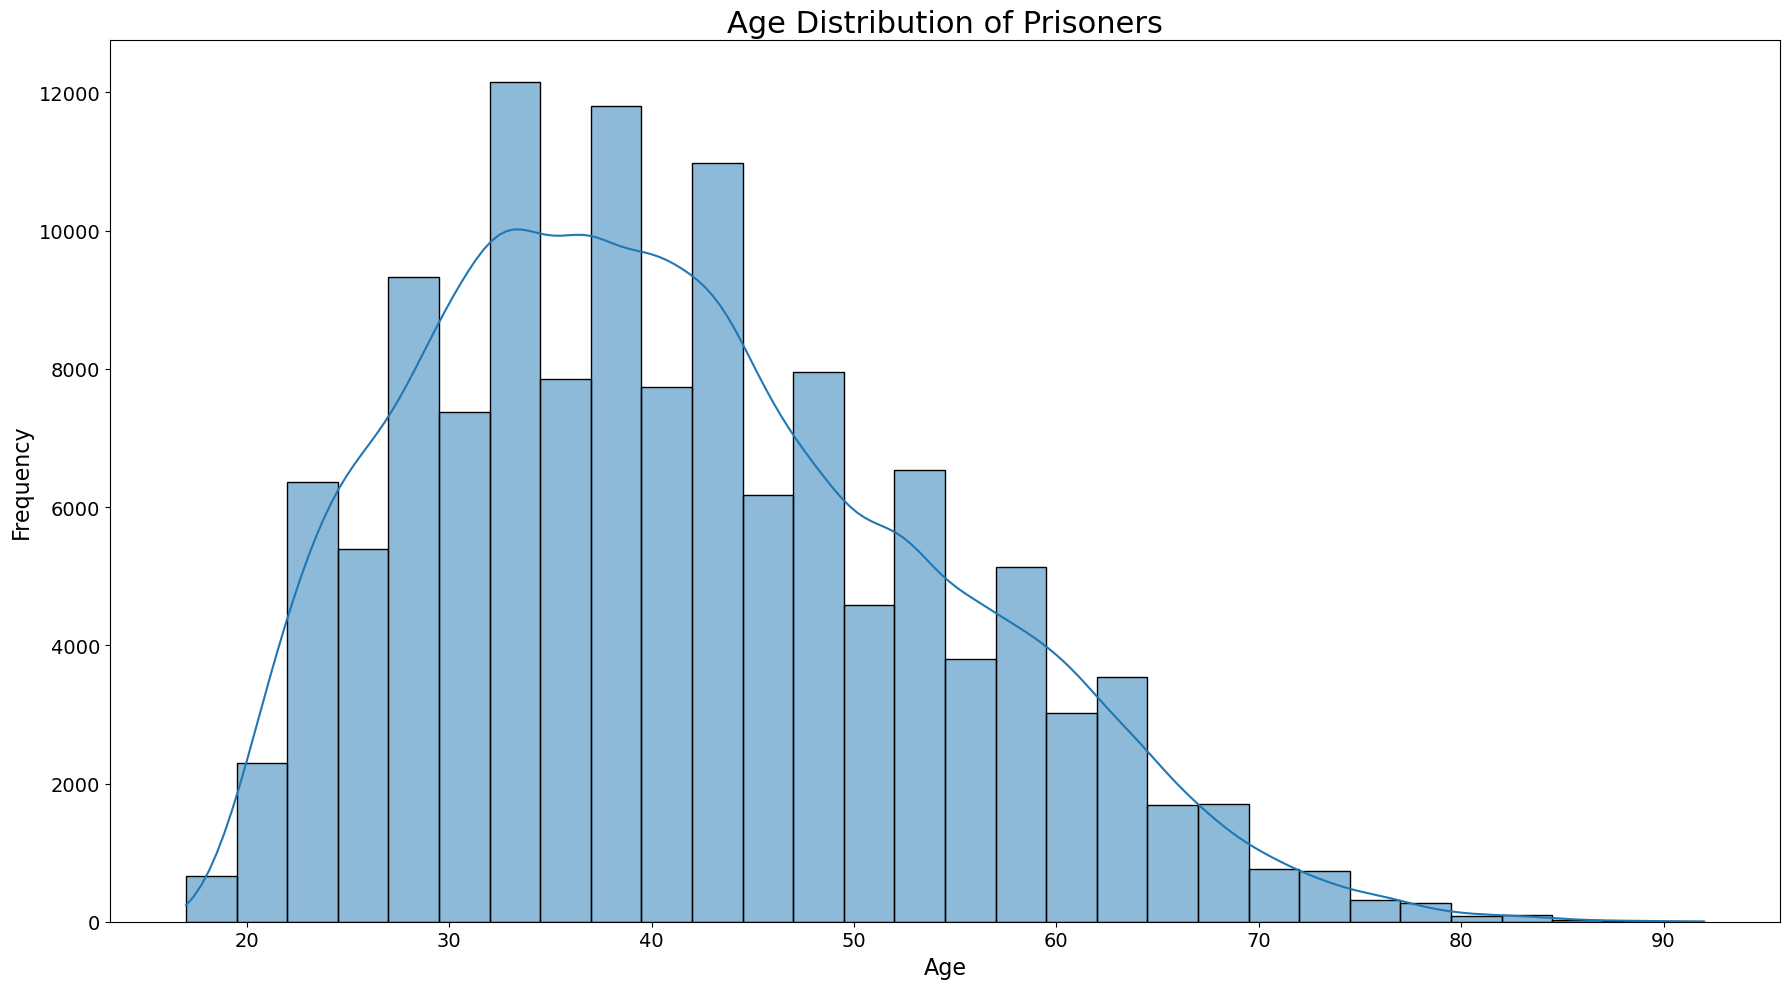

In [28]:
plt.figure(figsize=(18, 10))

# Histogram
sns.histplot(d4['Age'], bins=30, kde=True)
plt.title('Age Distribution of Prisoners', fontsize=22)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.show()


* Peak concentration of prisoners between ages 30-40, indicating prison population primarily consists of mid-30s to early 40s
* Right-skewed distribution shows higher prevalence of younger prisoners (20-30 age range), aligning with typical criminal activity patterns
* Decline in prisoner numbers after age 50, especially 60+, suggesting lower incidence of criminality or lenient sentencing for older adults
* Noticeable presence of prisoners across various ages, including 70s, 80s, and 90s, albeit in smaller numbers
* Modal age in early 30s highlights prevalence of this age group among prisoners
* Findings point to potential areas for targeted interventions like youth programs and job opportunities for crime prevention

### 2. Gender Distribution

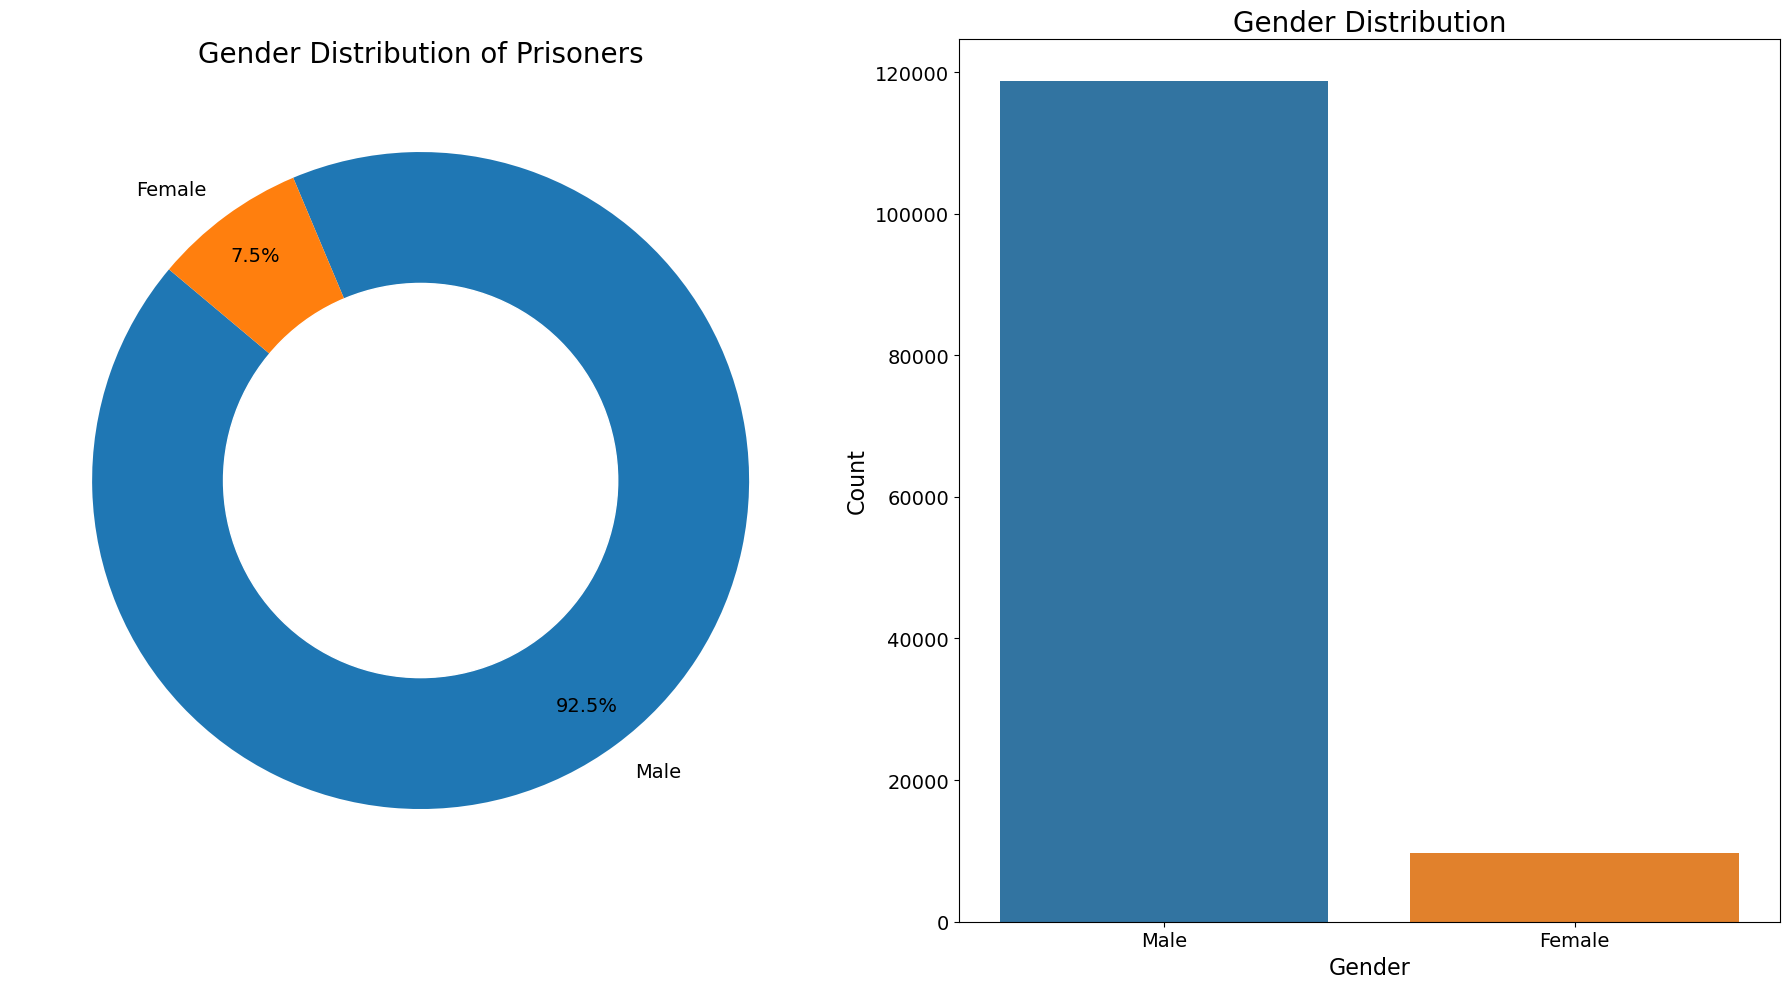

In [29]:
d4['Gender'].replace({'F': 'Female', 'M': 'Male'}, inplace=True)

gender_counts = d4['Gender'].value_counts()

# Donut Chart
plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
pie = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Gender Distribution of Prisoners', fontsize=20)
centre_circle = plt.Circle((0,0),0.60, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


plt.setp(pie[1], fontsize=14)  
plt.setp(pie[2], fontsize=14)  

# Bar Plot 
plt.subplot(1, 2, 2)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution', fontsize=20)
plt.xlabel('Gender', fontsize=16)
plt.ylabel('Count', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.tight_layout()
plt.show()



Significant gender disparity: Males 92.5%, Females 7.5%

### 3. Race Distribution 

/var/folders/0g/yx4fy_293310ptmy0_8grgq80000gn/T/ipykernel_95994/308211134.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)


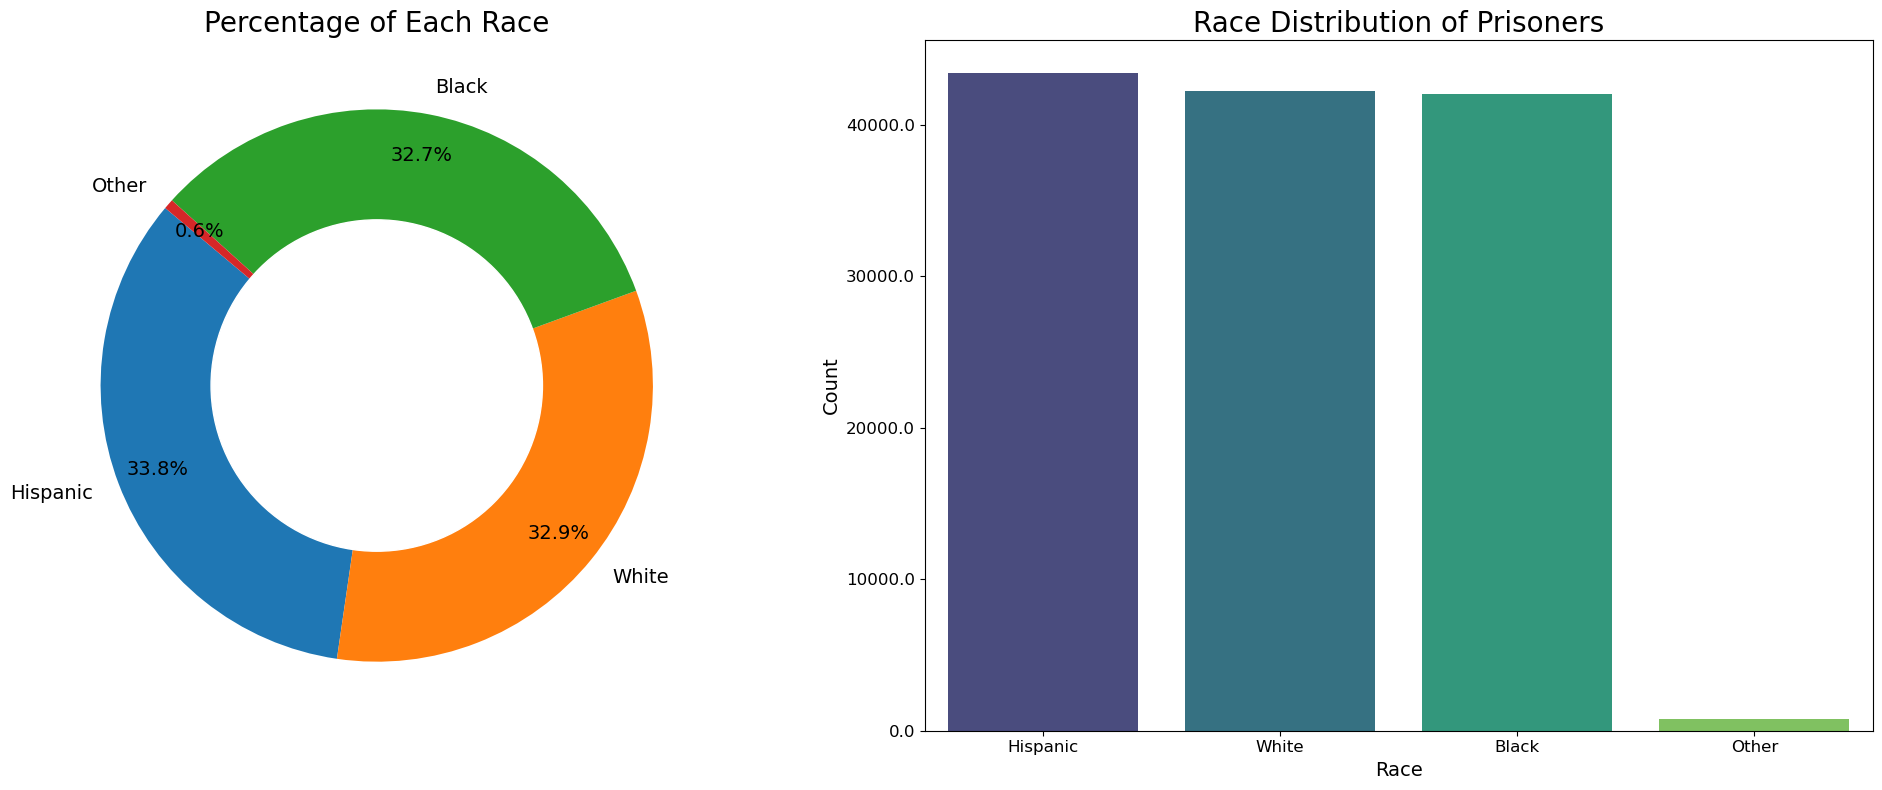

In [30]:
race_mapping = {
    'H': 'Hispanic',
    'W': 'White',
    'B': 'Black'
}

d4['Race_Consolidated'] = d4['Race'].apply(lambda x: race_mapping.get(x, 'Other'))


race_counts_consolidated = d4['Race_Consolidated'].value_counts()
plt.figure(figsize=(20, 8))

# Donut chart on the left
ax1 = plt.subplot(1, 2, 1)
pie = plt.pie(race_counts_consolidated, labels=race_counts_consolidated.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.title('Percentage of Each Race', fontsize=20)
centre_circle = plt.Circle((0,0),0.60, color='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
for label in ax1.texts:
    label.set_fontsize(14)

# Bar plot on the right 
ax2 = plt.subplot(1, 2, 2)
bar = sns.barplot(x=race_counts_consolidated.index, y=race_counts_consolidated.values, palette='viridis')
plt.title('Race Distribution of Prisoners', fontsize=20)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Count', fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), fontsize=12)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=12)

plt.tight_layout()
plt.show()



* Relatively balanced racial distribution: Black 32.7%, Hispanic 33.8%, White 32.9%, Other 0.6%
* Males vastly outnumber females across all racial categories
* Suggests potential societal, economic, and legal factors influencing incarceration rates among racial groups
* Findings highlight need to examine societal structures and criminal justice practices contributing to gender and racial disparities

### 4. Gender Distribution by Race

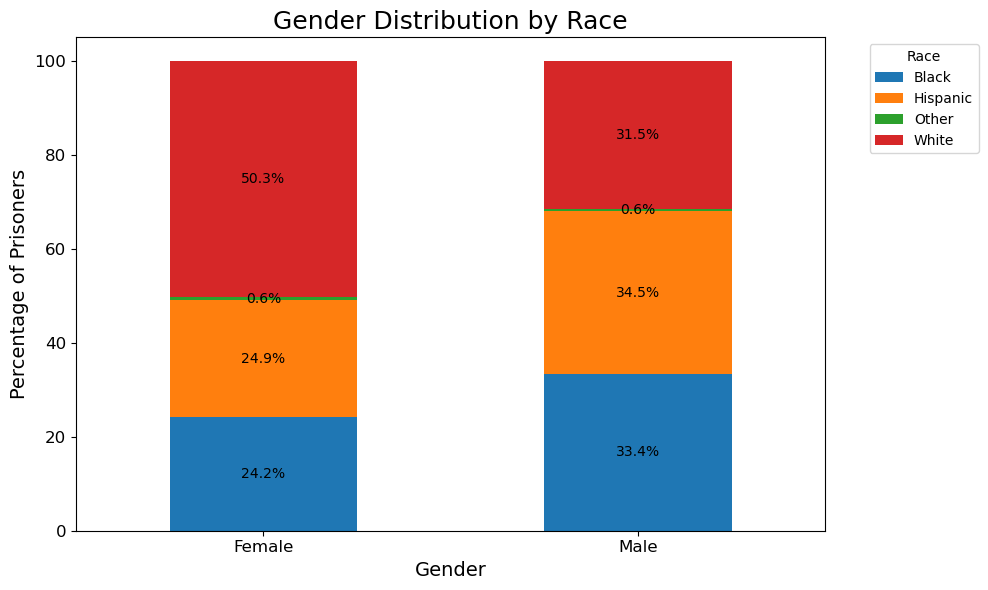

In [31]:
gender_race_crosstab = pd.crosstab(d4['Gender'], d4['Race_Consolidated'], normalize='index') * 100

# Plot the stacked bar chart
ax = gender_race_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
for rec in ax.patches:
    height = rec.get_height()
    ax.text(rec.get_x() + rec.get_width() / 2, 
            rec.get_y() + height / 2,
            "{:.1f}%".format(height),
            ha='center', 
            va='center')

plt.title('Gender Distribution by Race', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Percentage of Prisoners', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



* Gender distribution in the prison population shows significant disparities, with males comprising a larger portion than females.
* The racial composition varies notably between genders; female prisoners are predominantly white, followed by black and Hispanic.
* Male prisoners show a more even distribution across white, black, and Hispanic racial groups.
* Males have a higher representation of minority groups, especially black and Hispanic, compared to females.
* The 'other' category constitutes a small proportion in both gender groups.

# Geographic Analysis: 

### 1. Distribution of Prisoners across different facilities

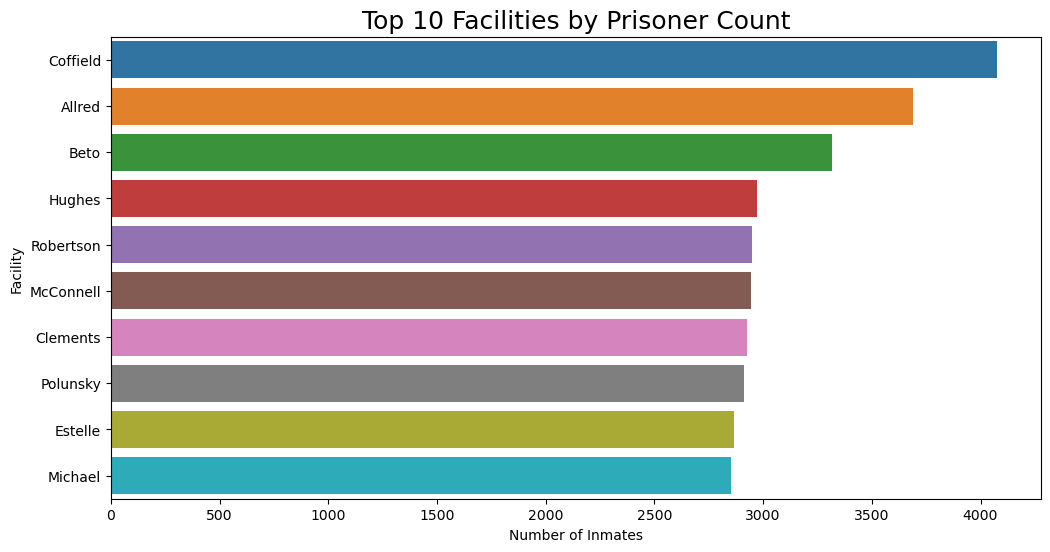

In [32]:
facility_distribution = d4['Current Facility'].value_counts()

top_facilities = facility_distribution.head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_facilities.values, y=top_facilities.index)
plt.title('Top 10 Facilities by Prisoner Count', fontsize=18)
plt.xlabel('Number of Inmates')
plt.ylabel('Facility')
plt.show()

* Prisoner distribution varies significantly among facilities, with the Coffield facility housing the most inmates at nearly 4000, making it the most populated in the top ten.
* The Michael facility has the fewest inmates among the top ten, with just over 1000 prisoners.
* The range in prisoner counts across facilities spans from more than 1000 to nearly 4000, reflecting a wide variation in facility populations.
* These differences in prisoner counts suggest varying capacities among the facilities, with larger facilities like Coffield potentially requiring more resources such as staff, security, and rehabilitation programs.
* The geographic locations of these facilities might influence their population sizes, which is an important consideration for correctional system administrators and policymakers in resource allocation and managing overpopulation.

### 2. Top 10 Counties with highest number of Prisoners

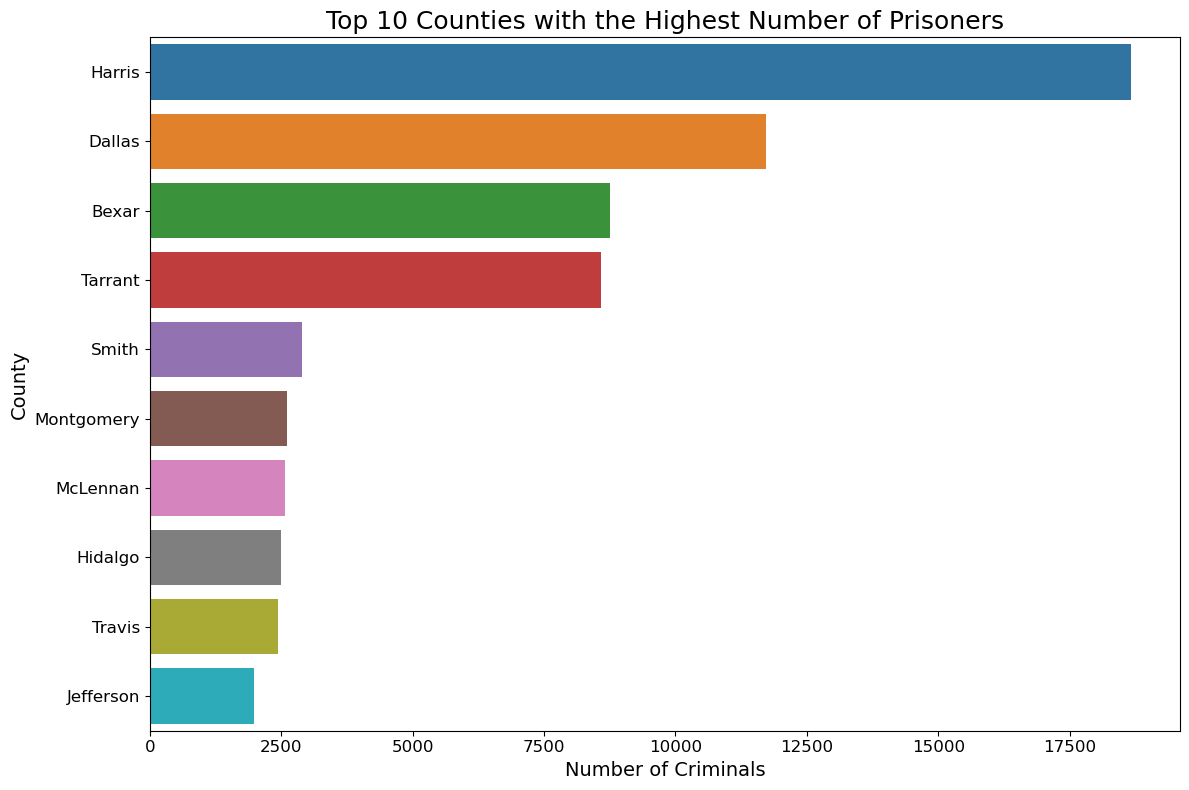

In [33]:
top_counties = d4['County'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 8))
county_plot = sns.barplot(x=top_counties.values, y=top_counties.index)
plt.title('Top 10 Counties with the Highest Number of Prisoners', fontsize=18)
plt.xlabel('Number of Criminals', fontsize=14)
plt.ylabel('County', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()

* There is significant variation in the number of prisoners among the top ten counties, reflecting differences in population size, crime rates, or law enforcement activity.
* Harris County leads with the highest number of prisoners, suggesting a large population or a high incarceration rate.
* Dallas County, ranking second, has significantly fewer inmates than Harris, indicating disparities that could stem from varying crime rates, social issues, economic conditions, or local criminal justice system policies.
* The notable disparity between counties in prisoner numbers may necessitate additional resources for law enforcement, judicial proceedings, and corrections, including targeted rehabilitation programs in higher-population counties.

## Offense Analysis

### 1. Top 10 Offenses

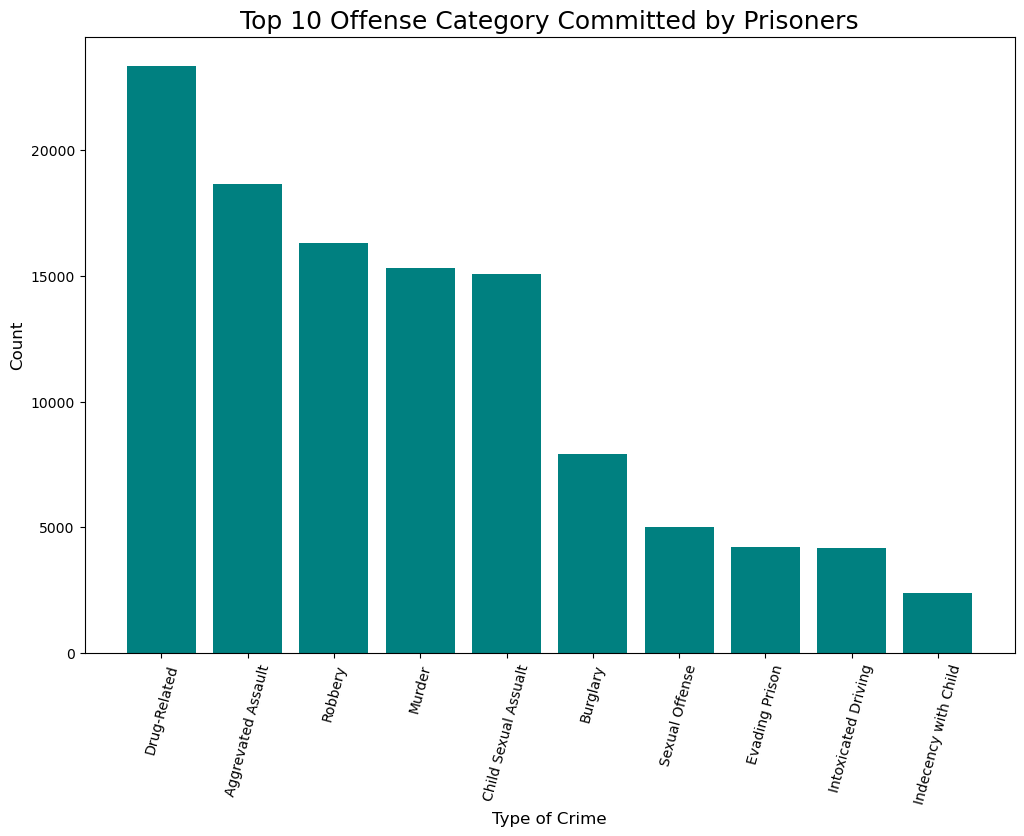

In [34]:
crime_counts = d4['Offense Category'].value_counts()

top_crimes = crime_counts.head(10)

# Creating the plot
plt.figure(figsize=(12, 8))
plt.bar(top_crimes.index, top_crimes.values, color='teal')
plt.title('Top 10 Offense Category Committed by Prisoners', fontsize=18)
plt.xlabel('Type of Crime', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=75)
plt.show()


**Drug-Related Crimes:** The highest number of prisoners are incarcerated for drug-related offenses, indicating their commonality among the top 10 reasons for imprisonment.<br>
**Violent Crimes:** Aggravated assault, robbery, and murder represent a significant portion of the prison population, highlighting the prevalence of violent offenses.<br>
**Intoxicated Driving and Indecency with Children:** These offenses rank as the least common among the top 10 reasons for imprisonment.<br>

The prevalence of drug-related offenses suggests a need for policy review regarding drug crimes and rehabilitation programs. Additionally, the chart reflects societal issues such as drug use, violence, and concerns regarding sexual crimes against children.

### 2. Trends in Offense category over Decades

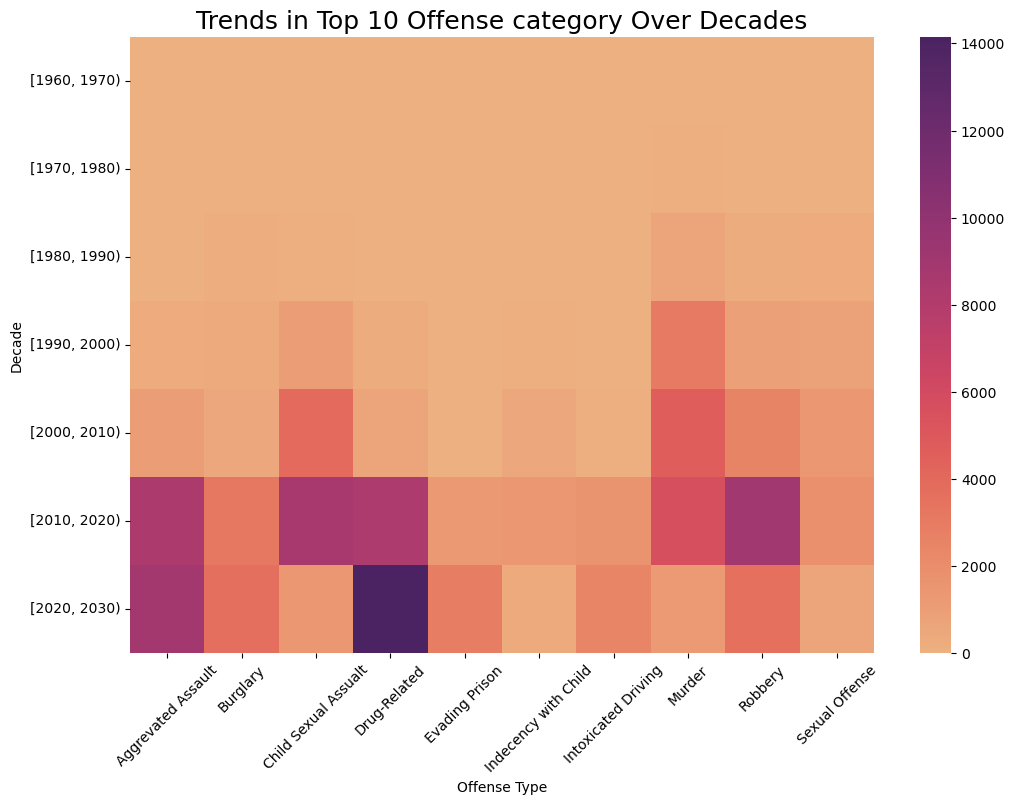

In [35]:
min_year = d4['Offense Year'].min()
max_year = d4['Offense Year'].max()

# Creating bins for each decade
bins = list(range(min_year, max_year + 10, 10))

d4.loc[:, 'Decade'] = pd.cut(d4['Offense Year'], bins, right=False)

# Top 10 Offenses
top_offenses = d4['Offense Category'].value_counts().head(10).index
offense_trends = d4[d4['Offense Category'].isin(top_offenses)].groupby(['Decade', 'Offense Category']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(offense_trends, cmap="flare")
plt.title('Trends in Top 10 Offense category Over Decades', fontsize=18)
plt.xlabel('Offense Type')
plt.ylabel('Decade')
plt.xticks(rotation=45)  
plt.show()


The heatmap illustrates the trends in the top 10 offense categories over various decades, from the 1960s to the
2030s. Here are some inferences that can be drawn from the heatmap:

1. **Drug-Related Offenses:** "Drug Related" offenses have become more prevalent over time, particularly from
the [1990, 2000] decade onwards. This might reflect changes in laws, enforcement practices, societal attitudes
towards drugs, or actual increases in drug-related criminal activity.<br>
2. **Robbery:**"Robbery" also shows an increase, especially in the latest decade ([2010, 2020]). This could be
indicative of socio-economic factors that have led to an increase in such crimes or changes in reporting and
recording practices.<br>

The analysis of the heatmap spanning from the 1960s to the 2030s reveals significant shifts in the
frequency of top 10 offense categories over time. Notably, recent decades exhibit a higher count of cases
across most offense types compared to earlier periods. The observed increase in certain offenses, particularly
"Drug Related" and "Robbery," suggests a need for deeper investigation into underlying causes, which could
inform policy-making, law enforcement strategies, and scholarly research. This visualization serves as a
valuable tool for highlighting longitudinal changes in the frequency of different offense types, offering insights
into evolving patterns of criminal activity over decades.

### 3. Average Difference Between Offense and Sentence Years for Top 10 Offenses

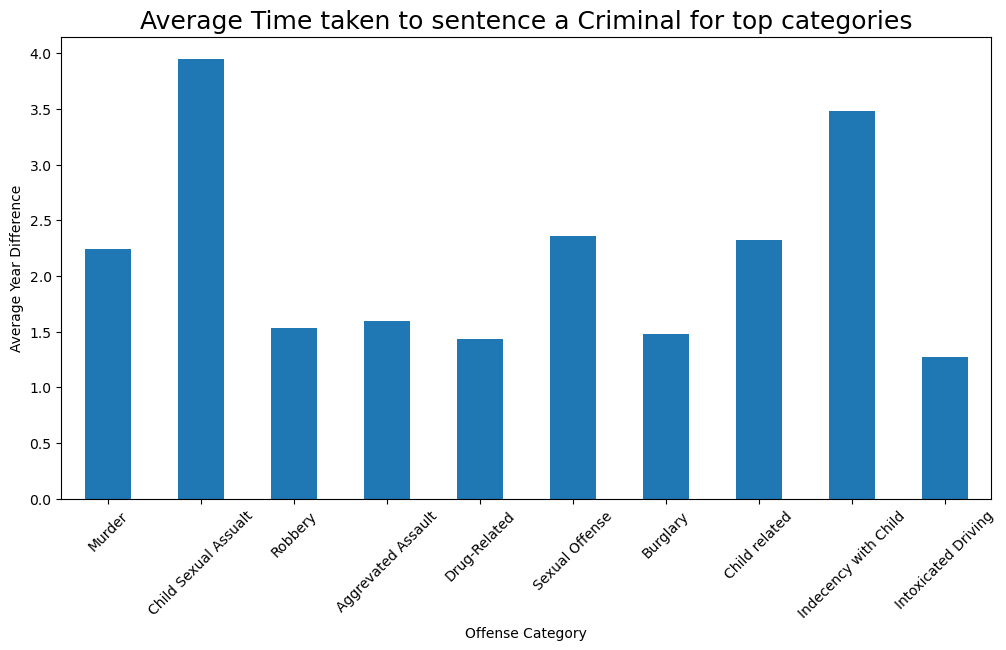

In [36]:
total_years_by_offense = d4.groupby('Offense Category')['Sentence (Years)'].sum().sort_values(ascending=False)

# Identify the top 10 offenses with the most sentence years given
top_10_offenses = total_years_by_offense.head(10).index
top_offenses_df = d4[d4['Offense Category'].isin(top_10_offenses)].copy()

# Difference between offense and sentence years for these top offenses
top_offenses_df['Year Difference'] = top_offenses_df['Sentence Year'] - top_offenses_df['Offense Year']

# Calculate the average or median year difference for these top offenses
avg_diff_by_offense = top_offenses_df.groupby('Offense Category')['Year Difference'].mean().loc[top_10_offenses]
avg_diff_by_offense.plot(kind='bar', figsize=(12, 6))
plt.title('Average Time taken to sentence a Criminal for top categories', fontsize=18)
plt.xlabel('Offense Category')
plt.ylabel('Average Year Difference')
plt.xticks(rotation=45)  
plt.show()


The chart illustrates the average time gap between the year an offense was committed and the year
a sentence was handed down for different categories of offenses<br>

**Longest Delays:** "Child Sexual Assault" and "Indecency with Child" exhibit the lengthiest average delays in sentencing, with "Child Sexual Assault" surpassing 3.5 years on average.<br>
**Shortest Delays:** "Murder" cases have the briefest average delay, slightly over 2 years, suggesting expedited processing compared to other offenses.

Delays in cases involving children may stem from their sensitive nature, necessitating thorough investigations and evidence gathering. Conversely, the seriousness of murder cases likely leads to prioritized processing. Differences may also reflect legal complexities or judicial backlog. Policymakers and judicial administrators can utilize this data to probe causes of sentencing delays, aiming to enhance efficiency and reduce processing times.

## Sentence Analysis

### 1. Relationship between Age and Sentence

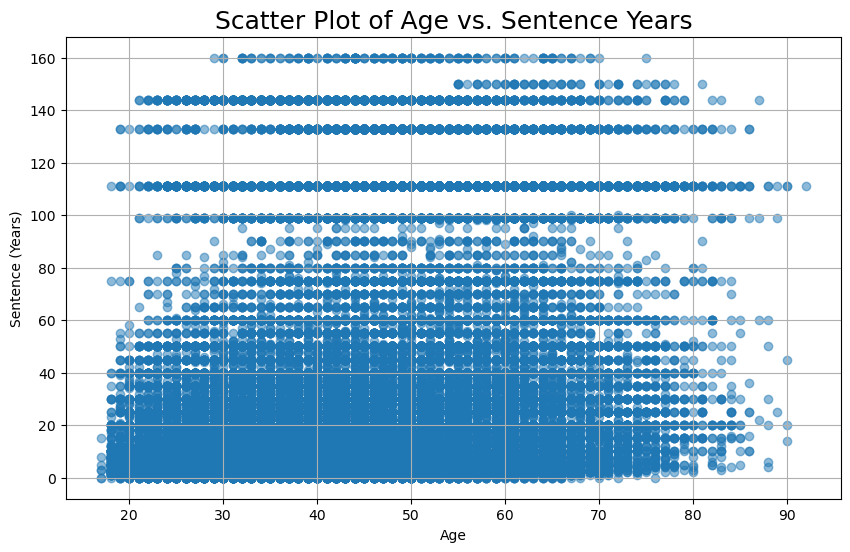

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(d4['Age'], d4['Sentence (Years)'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Sentence (Years)')
plt.title('Scatter Plot of Age vs. Sentence Years', fontsize=18)
plt.grid(True)
plt.show()


* The distribution of sentence lengths is primarily concentrated in the lower range (0-40 years) across all age groups, with fewer instances of longer sentences as the years increase.
* Individuals aged between 20 and 60 years exhibit a relatively consistent spread in the range of sentence lengths.
* Older individuals, specifically those over 60, are less likely to receive long sentences compared to younger cohorts.
* The presence of extreme sentence values, such as those exceeding 150 years, indicate life sentences or reflect the accumulation of multiple charges.

### 2. Top Offense Category that are punished by "Life" sentence

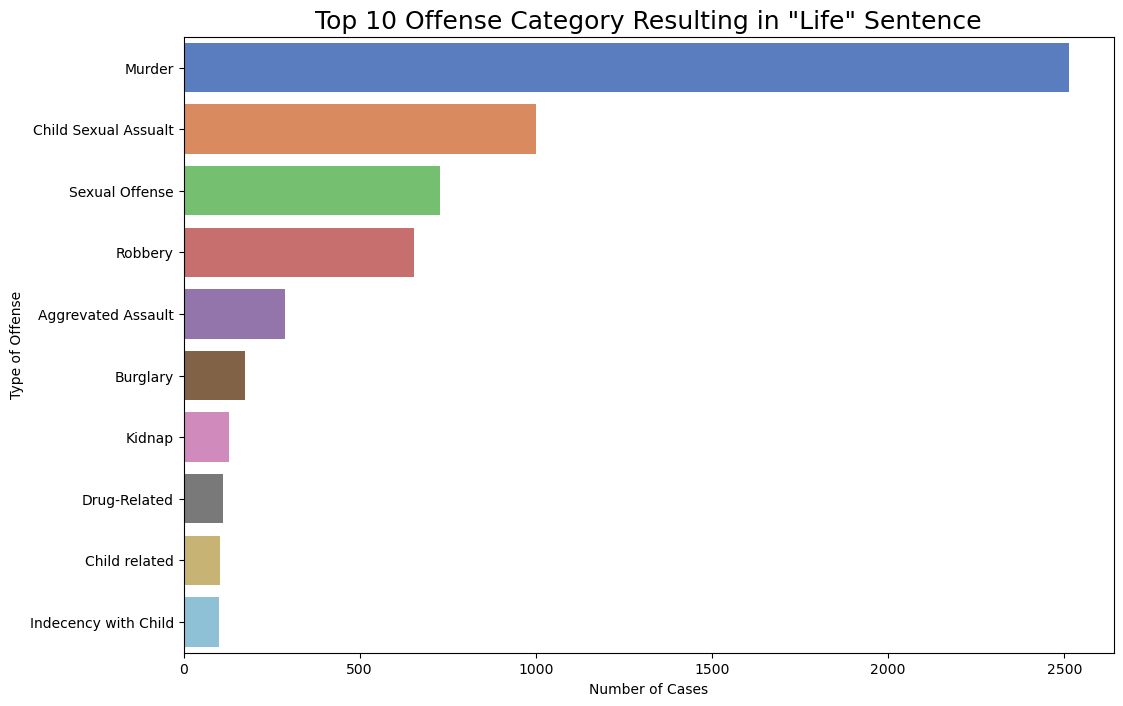

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sentence_160_years = d4[d4['Sentence (Years)'] == 111]

# Count the occurrences of each offense type among those sentences
offense_counts_160 = sentence_160_years['Offense Category'].value_counts()

# Select the top 10 offenses
top_10_offenses_160 = offense_counts_160.head(10)

# Plotting the top 10 offenses with 160 years sentence
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_offenses_160.values, y=top_10_offenses_160.index, palette='muted')
plt.title('Top 10 Offense Category Resulting in "Life" Sentence', fontsize=18)
plt.xlabel('Number of Cases')
plt.ylabel('Type of Offense')
plt.show()


* Murder is the leading offense resulting in life sentences, significantly outpacing other crimes, highlighting its severity in judicial proceedings.
* Child Sexual Assault and Sexual Offense, while less frequent than Murder, still account for a considerable number of life sentences, underlining their gravity.
* Robbery and Aggravated Assault are also major offenses frequently resulting in life sentences, indicating their serious treatment within the legal system.
* Burglary, Kidnapping, and Drug-Related offenses, though less common, still see a moderate number of life sentences, reflecting the seriousness with which these crimes are regarded by the judiciary.

## Release Forecast

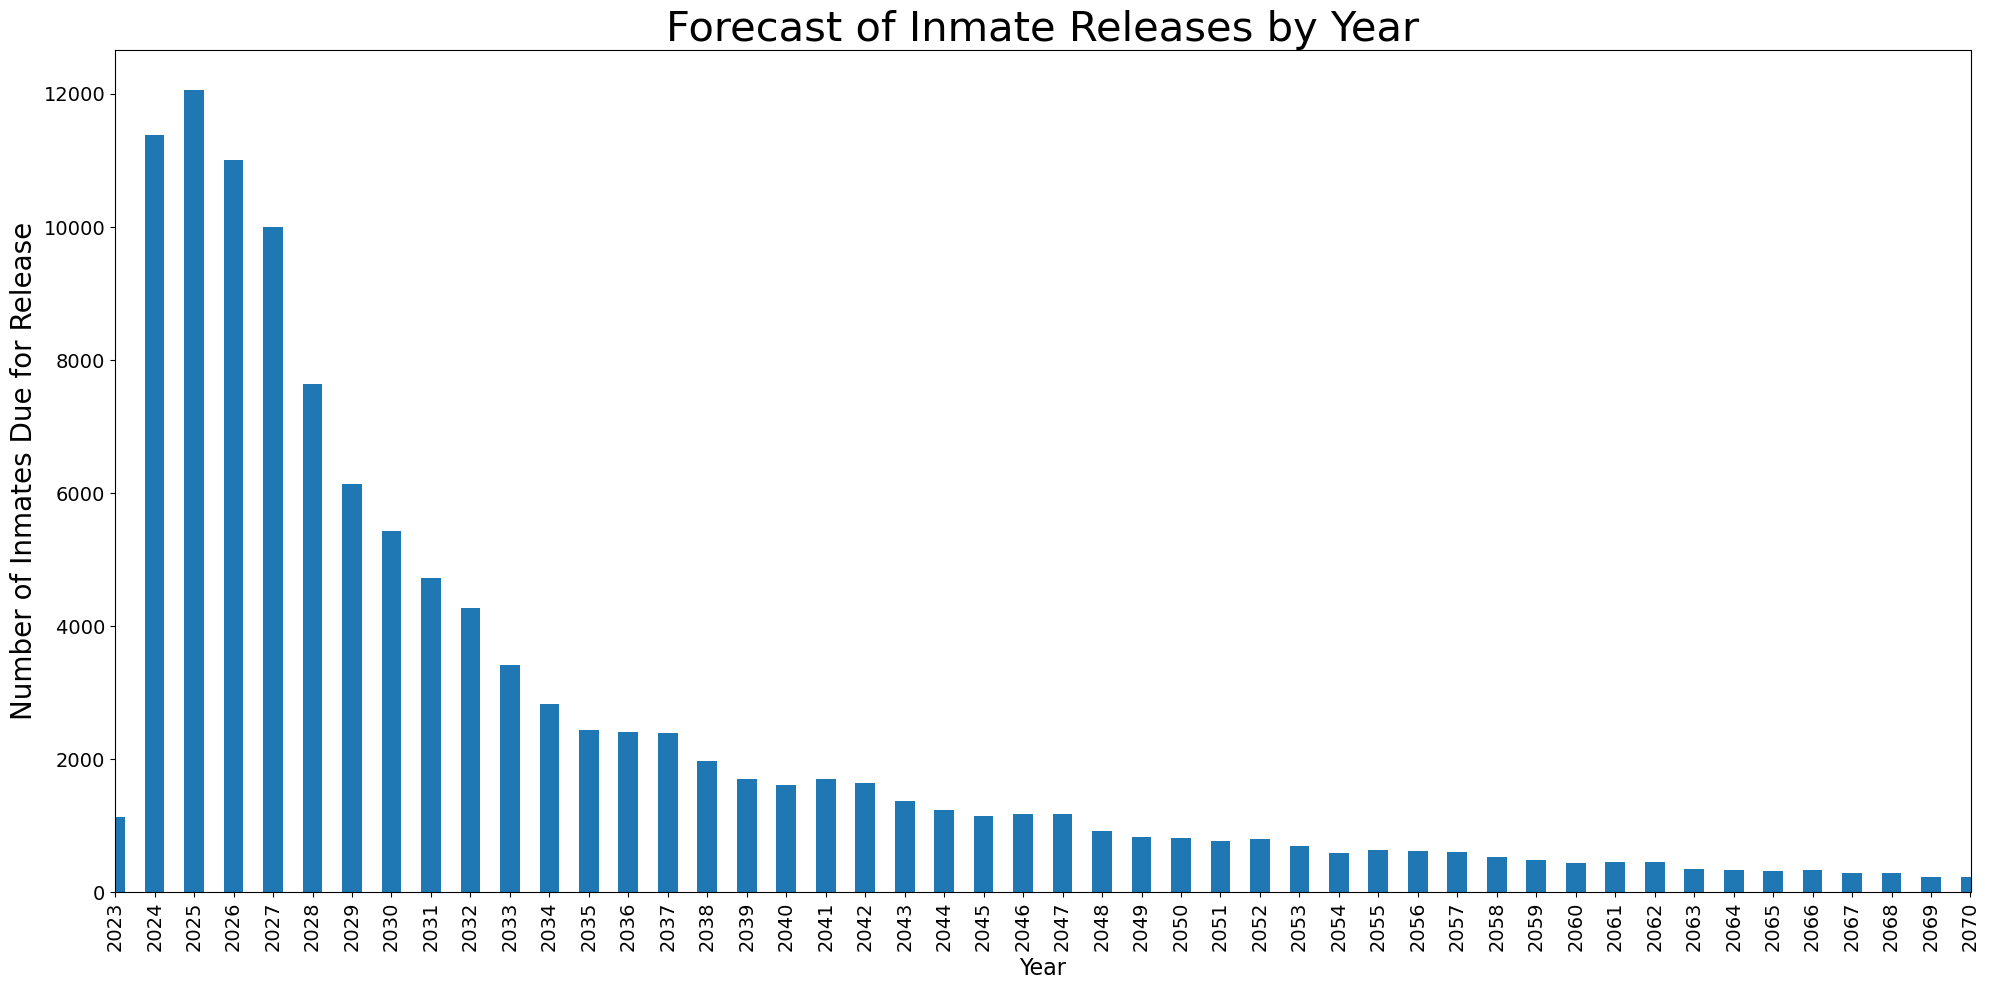

In [45]:
release_forecast = d4['Release Year'].value_counts().sort_index()

plt.figure(figsize=(20, 10))
release_forecast_plot = release_forecast.plot(kind='bar', fontsize=14)
plt.title('Forecast of Inmate Releases by Year', fontsize=30)  
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Inmates Due for Release', fontsize=20)
plt.xticks(rotation=90)
plt.xlim(0, 2070 - release_forecast.index.min())
max_display_year = 2123
plt.gca().set_xticklabels([label if int(label.get_text()) <= max_display_year else '' for label in plt.gca().get_xticklabels()])
plt.tight_layout()
plt.show()


## CONCLUSION

Impact on Policy and Legislation:<br>

● **Reduced Prison Overcrowding:** The identified incarceration patterns across demographics, geographies, and offenses can be used to inform data-driven policies aimed at reducing racial disparities, addressing low-level offenses, and implementing alternative sentencing options. This could ease the strain on prison infrastructure and resource allocation.<br>
● **Equitable Legal Proceedings**: Analyzing the factors that influence sentence length and parole eligibility can expose potential biases and inequities in the legal system. These findings can be used to advocate for more equitable sentencing guidelines, better legal representation, and lower racial disparities in criminal justice outcomes.<br>
● **Enhanced Rehabilitation and Reintegration**: Understanding the characteristics of the prison population and their rehabilitation requirements can result in data-driven investments in effective programs and support systems. Improving educational opportunities, mental health services, and job training could all help with successful reintegration and lower recidivism rates.<br>

Improved Efficiency in the Legal System:<br>

● **Streamlined Procedures:** Analyzing legal delays can help identify inefficiencies, such as backlogs in court schedules or complexities in case management. This information can be used to inform targeted reforms aimed at expediting legal proceedings and improving access to justice.<br>
● **Advanced Case Management Systems:** Implementing technology-driven solutions can greatly increase efficiency. Modern case management systems can automate tasks, organize data, and facilitate stakeholder communication, resulting in fewer delays and more efficient legal processes.